In [16]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import random
import tensorflow as tf
import xgboost as xgb # 1.5.0\n",
from skopt import BayesSearchCV 
from skopt.space import Integer
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
xgb_file = "Cleaned_data.csv"
xgb_encode_file = "Cleaned_data_encode.csv"
data = pd.read_csv(xgb_file, encoding='gbk')  
data['Date_Time'] = pd.to_datetime(data['Date_Time'])
data = data.dropna()
data = data[data != -999].dropna()
data.head()

,ID,Date_Time,AC_Status,Window_Status,CLast_Time,CLast_Time_T,WLast_Time,WLast_Time_T,Indoor_Temp,Indoor_RH,...,Room_ID,Study_ID,City,Next_Indoor_Temp,Next_Indoor_RH,Next_Outdoor_Temp,Next_Outdoor_RH,Differ_Outdoor_Temp,Differ_Indoor_Temp,Target_Temp
0,1,2019-03-05 00:00:00,0,0.0,0,0,0.0,0.0,25.12,70.84,...,A,6,Florianopolis,25.09,71.22,26.0,84.0,0.0,-0.03,0.0
1,2,2019-03-05 01:00:00,0,0.0,0,0,0.0,0.0,25.09,71.22,...,A,6,Florianopolis,25.05,71.66,26.0,89.0,0.0,-0.04,0.0
2,3,2019-03-05 02:00:00,0,0.0,0,0,0.0,0.0,25.05,71.66,...,A,6,Florianopolis,25.02,71.84,26.0,89.0,0.0,-0.03,0.0
3,4,2019-03-05 03:00:00,0,0.0,0,0,0.0,0.0,25.02,71.84,...,A,6,Florianopolis,24.97,72.11,25.0,89.0,-1.0,-0.05,0.0
4,5,2019-03-05 04:00:00,0,0.0,0,0,0.0,0.0,24.97,72.11,...,A,6,Florianopolis,24.92,72.12,25.0,89.0,0.0,-0.05,0.0


In [3]:
# Show the tail of the data
data.tail()  # Shows the last 5 rows by default

,ID,Date_Time,AC_Status,Window_Status,CLast_Time,CLast_Time_T,WLast_Time,WLast_Time_T,Indoor_Temp,Indoor_RH,...,Room_ID,Study_ID,City,Next_Indoor_Temp,Next_Indoor_RH,Next_Outdoor_Temp,Next_Outdoor_RH,Differ_Outdoor_Temp,Differ_Indoor_Temp,Target_Temp
42928,42929,2019-04-30 18:00:00,0,1.0,0,0,60.0,90.0,25.6,48.6,...,R,16,Sao Paulo,25.1,53.6,20.0,83.0,0.0,-0.5,0.0
42929,42930,2019-04-30 19:00:00,0,1.0,0,0,60.0,150.0,25.1,53.6,...,R,16,Sao Paulo,24.7,56.1,19.0,88.0,-1.0,-0.4,0.0
42930,42931,2019-04-30 20:00:00,0,1.0,0,0,60.0,210.0,24.7,56.1,...,R,16,Sao Paulo,24.5,57.3,20.0,83.0,1.0,-0.2,0.0
42931,42932,2019-04-30 21:00:00,0,1.0,0,0,60.0,270.0,24.5,57.3,...,R,16,Sao Paulo,24.3,58.3,19.0,83.0,-1.0,-0.2,0.0
42932,42933,2019-04-30 22:00:00,0,1.0,0,0,60.0,330.0,24.3,58.3,...,R,16,Sao Paulo,24.1,57.4,20.0,83.0,1.0,-0.2,0.0


In [4]:
for col in data.columns:
    if data[col].dtype == 'object':
        lb = LabelEncoder()
        data[col] = lb.fit_transform(data[col].astype(str))

In [5]:
x = data.drop(['Next_Indoor_Temp','Next_Indoor_RH','Date_Time','Study_ID','Differ_Indoor_Temp','ID'], axis=1)
y = data['Differ_Indoor_Temp']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [7]:
model_XGB = xgb.XGBRegressor(
   random_state=2000, max_depth=5, learning_rate=0.23474, n_estimators=500
)
model_XGB.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.23474, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2000, ...)

In [17]:
# Make predictions on the test set
y_pred = model_XGB.predict(x_test)

In [18]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.3500
R²: 0.4743


In [19]:
import random

class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, state, action, next_state, reward):
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = (state, action, next_state, reward)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [20]:
#DQN
class DQN(tf.keras.Model):
        def __init__(self):
            super(DQN, self).__init__()
            self.dense1 = tf.keras.layers.Dense(64, activation='relu')
            self.dense2 = tf.keras.layers.Dense(64, activation='relu')
            self.output_layer = tf.keras.layers.Dense(num_actions, activation='linear')
    
        def call(self, inputs):
            x = self.dense1(inputs)
            x = self.dense2(x)
            return self.output_layer(x)

        

In [21]:
#Create Deep Q-Network (DQN) Model
def update_Q_network():
            states, actions, next_states, rewards = zip(*replay_buffer.sample(batch_size))
            states = np.array(states)
            actions = np.array(actions)
            next_states = np.array(next_states)
            rewards = np.array(rewards)
    
            with tf.GradientTape() as tape:
                Q_values = Q_network(states)
                target_Q_values = Q_network(next_states)
                target_Q_values = rewards + gamma * tf.reduce_max(target_Q_values, axis=1)
                mask = tf.one_hot(actions, num_actions)
                Q_action = tf.reduce_sum(tf.multiply(Q_values, mask), axis=1)
                loss = loss_function(target_Q_values, Q_action)
    
            grads = tape.gradient(loss, Q_network.trainable_variables)
            optimizer.apply_gradients(zip(grads, Q_network.trainable_variables))

In [22]:
#Create Target Network Update Function
def update_target_network():
            target_network.set_weights(Q_network.get_weights())
    
        #Create ε-Greedy Policy\n
def epsilon_greedy_policy(state, epsilon):
            if np.random.rand() < epsilon:
                return np.random.randint(num_actions)
            else:
                Q_values = Q_network(np.array([state]))
                return np.argmax(Q_values)
                
        # Define Reward Function
def calculate_reward(state, step, action, next_state):
            reward = 0
            standard = 'ASHRAE'
            coordinates_dict = {'ASHRAE': [[17.4, 18.4, 23.4, 24.4], [23.6, 24.6, 29.6, 30.6], [10, 30]]}
            L11, L12, U12, U11 = coordinates_dict[standard][0]
            L21, L22, U22, U21 = coordinates_dict[standard][1]
            T1, T2 = coordinates_dict[standard][2]
            InT, OutT = next_state[0], next_state[2]
            if OutT <= T1:
                L1, L2, U2, U1 = L11, L12, U12, U11
            elif OutT >= T2:
                L1, L2, U2, U1 = L21, L22, U22, U21
            else:
                increase = (OutT-T1)*(L21-L11)/(T2-T1)
                L1, L2, U2, U1 = L11+increase, L12+increase, U12+increase, U11+increase
            if InT>=L2 and InT<=U2:
                reward = 0
            elif InT<L2:
                reward = -(InT-L2) ** 2
            elif InT>U2:
                reward = -(InT-U2) ** 2
            if action==0 or action==12:
                reward = reward+0
            elif action>12:
                reward = reward-2*(60*0.87*1)
            else:
                reward = reward-(60*0.87*1)
            return reward
    
        # Establish Mapping between Actions and Index
def map_action_to_dataframe(action):
            Target_Temp, AC_Status, Window_Status,CLast_Time,WLast_Time = 0,0,0,0,0
            action = int(action)
            if action == 0:
                Target_Temp = 0
                AC_Status = 0
                CLast_Time = 0
                Window_Status = 0
                WLast_Time = 0
            elif action>0 and action<12:
                Target_Temp = 19 + action
                AC_Status = 1
                CLast_Time = 60
                Window_Status = 0
                WLast_Time = 0
            elif action == 12:
                Target_Temp = 0
                AC_Status = 0
                CLast_Time = 0
                Window_Status = 1
                WLast_Time = 60
            else:
                Target_Temp = action+7
                AC_Status = 1
                CLast_Time = 60
                Window_Status = 1
                WLast_Time = 60
            return Target_Temp, AC_Status, Window_Status,CLast_Time,WLast_Time 

In [23]:
#Filter Data for One Day
def chose_data(a,data):
            data_test00 = data[a:a+23]
            data_test0a = data_test00.reset_index(drop=True) 
            data_test0 = data_test00.reset_index(drop=True)
            new_time_c = data_test0a.iloc[0]['CLast_Time_T'] - data_test0a.iloc[0]['AC_Status']*60
            data_test0.at[0,'CLast_Time_T'] = new_time_c
            new_time_w = data_test0a.iloc[0]['WLast_Time_T'] - data_test0a.iloc[0]['Window_Status']*60
            data_test0.at[0,'WLast_Time_T'] = new_time_w
            data_test = data_test0[['Indoor_Temp','Indoor_RH','Outdoor_Temp','Outdoor_RH','Rain','Cloud','Windspeed','Hour','Next_Outdoor_Temp','Next_Outdoor_RH']].copy()
            xgboost_test = data_test0.drop(['Next_Indoor_Temp','Next_Indoor_RH','Date_Time','Study_ID','Differ_Indoor_Temp','ID'],axis=1)
            return data_test,xgboost_test

In [32]:
episode_list = []
total_reward_list = []
best_policy = []
next_in_temp_list = []
AC_Status_List=[]
W_Status_List=[]

data_RL = data

#for i in range(0,1):
    
for i in range(3): #number of days for training
        print(f"\n=== Day {i+1} ===")

        # Define Parameters
        num_features = 8
        num_actions = 24
        gamma = 0.9  # Discount factor 
        epsilon = 1.0  # Initial exploration rate 
        min_epsilon = 0.1  # Minimum exploration rate 
        epsilon_decay = 0.995  # Exploration rate decay factor 
        learning_rate = 0.001  # Learning rate 
        memory_capacity = 10000  # Experience replay buffer capacity 
        batch_size = 32  # Batch size 
    
        # Create Q-Network and Target Network
        Q_network = DQN()
        target_network = DQN()
        
        # Define Loss Function and Optimizer
        loss_function = tf.losses.MeanSquaredError()
        optimizer = tf.optimizers.Adam(learning_rate)
    
        # Create Experience Replay Buffer
        replay_buffer = ReplayBuffer(memory_capacity)
    
        # Train DQN
        data_test,xgboost_test = chose_data(i*24,data_RL)
        num_episodes = 1000
        for episode in range(num_episodes):
            episode_list.append(episode)
            data_pre_test = data_test
            xgboost_pre_test = xgboost_test
            total_reward = 0
            for step in range(6):
                xgboost_pre_test.loc[step, ['Target_Temp', 'AC_Status', 'Window_Status', 'CLast_Time', 'WLast_Time', 'CLast_Time_T', 'WLast_Time_T']] = 0
                hour_row_df = pd.DataFrame(xgboost_pre_test.iloc[step]).T
                next_differ_temp_list = model_XGB.predict(hour_row_df) 
                next_differ_temp = next_differ_temp_list[0]
                next_in_temp = xgboost_pre_test.iloc[step]['Indoor_Temp']+next_differ_temp
                xgboost_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
                data_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
            state = data_pre_test.iloc[6, :num_features].values  
            for step in range(6,18):
                action = epsilon_greedy_policy(state, epsilon)
                Target_Temp, AC_Status, Window_Status,CLast_Time,WLast_Time = map_action_to_dataframe(action)
                xgboost_pre_test.at[step,'Target_Temp'] = Target_Temp
                xgboost_pre_test.at[step,'AC_Status'] = AC_Status
                xgboost_pre_test.at[step,'Window_Status'] = Window_Status
                xgboost_pre_test.at[step,'CLast_Time'] = CLast_Time
                xgboost_pre_test.at[step,'WLast_Time'] = WLast_Time
                if CLast_Time > 0:
                    xgboost_pre_test.at[step, 'CLast_Time_T'] = xgboost_pre_test.iloc[step-1]['CLast_Time_T'] + CLast_Time
                else:
                    xgboost_pre_test.at[step, 'CLast_Time_T'] = 0
                if WLast_Time > 0:
                    xgboost_pre_test.at[step, 'WLast_Time_T'] = xgboost_pre_test.iloc[step-1]['WLast_Time_T'] + WLast_Time
                else:
                    xgboost_pre_test.at[step, 'WLast_Time_T'] = 0
                hour_row_df = pd.DataFrame(xgboost_pre_test.iloc[step]).T
                next_differ_temp_list = model_XGB.predict(hour_row_df) 
                next_differ_temp = next_differ_temp_list[0]
                next_in_temp = xgboost_pre_test.iloc[step]['Indoor_Temp']+next_differ_temp
                xgboost_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
                data_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
                next_state = data_pre_test.iloc[step+1, :num_features].values           
                reward = calculate_reward(state,step, action, next_state)
                total_reward += reward
                replay_buffer.push(state, action, next_state, reward)
                state = next_state
                if epsilon > min_epsilon:
                        epsilon *= epsilon_decay
                if len(replay_buffer.memory) >= batch_size:
                    update_Q_network()
            total_reward_list.append(total_reward)
    
        # Training Completed, Make Decisions
        data_pre_test = data_test
        xgboost_pre_test = xgboost_test
        for step in range(0,6):
            if step ==0:
                temp_original = data_pre_test.iloc[step]['Indoor_Temp']
                next_in_temp_list.append(temp_original)
            best_policy.append(0)
            AC_Status_List.append(0)
            W_Status_List.append(0)
            xgboost_pre_test.loc[step, ['Target_Temp', 'AC_Status', 'Window_Status', 'CLast_Time', 'WLast_Time', 'CLast_Time_T', 'WLast_Time_T']] = 0
            hour_row_df = pd.DataFrame(xgboost_pre_test.iloc[step]).T
            next_differ_temp_list = model_XGB.predict(hour_row_df) 
            next_differ_temp = next_differ_temp_list[0]
            next_in_temp = xgboost_pre_test.iloc[step]['Indoor_Temp']+next_differ_temp
            xgboost_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
            next_in_temp_list.append(next_in_temp)
            data_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
        state = data_pre_test.iloc[6, :num_features].values
        for step in range(6,18):
            action = epsilon_greedy_policy(state, 0)
            Target_Temp, AC_Status, Window_Status,CLast_Time,WLast_Time = map_action_to_dataframe(action)
            best_policy.append(action)
            AC_Status_List.append(AC_Status)
            W_Status_List.append(Window_Status)
            xgboost_pre_test.at[step,'Target_Temp'] = Target_Temp
            xgboost_pre_test.at[step,'AC_Status'] = AC_Status
            xgboost_pre_test.at[step,'Window_Status'] = Window_Status
            xgboost_pre_test.at[step,'CLast_Time'] = CLast_Time
            xgboost_pre_test.at[step,'WLast_Time'] = WLast_Time
            if CLast_Time > 0:
                xgboost_pre_test.at[step, 'CLast_Time_T'] = xgboost_pre_test.iloc[step-1]['CLast_Time_T'] + CLast_Time
            else:
                xgboost_pre_test.at[step, 'CLast_Time_T'] = 0
            if WLast_Time > 0:
                xgboost_pre_test.at[step, 'WLast_Time_T'] = xgboost_pre_test.iloc[step-1]['WLast_Time_T'] + WLast_Time
            else:
                xgboost_pre_test.at[step, 'WLast_Time_T'] = 0
            hour_row_df = pd.DataFrame(xgboost_pre_test.iloc[step]).T
            next_differ_temp_list = model_XGB.predict(hour_row_df) 
            next_differ_temp = next_differ_temp_list[0]
            next_in_temp = xgboost_pre_test.iloc[step]['Indoor_Temp']+next_differ_temp
            xgboost_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
            next_in_temp_list.append(next_in_temp)
            data_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
            next_state = data_pre_test.iloc[step+1, :num_features].values      
            state = next_state
        for step in range(18,23):
            best_policy.append(0)
            AC_Status_List.append(0)
            W_Status_List.append(0)
            xgboost_pre_test.loc[step, ['Target_Temp', 'AC_Status', 'Window_Status', 'CLast_Time', 'WLast_Time', 'CLast_Time_T', 'WLast_Time_T']] = 0
            hour_row_df = pd.DataFrame(xgboost_pre_test.iloc[step]).T
            next_differ_temp_list = model_XGB.predict(hour_row_df)
            next_differ_temp = next_differ_temp_list[0]
            next_in_temp = xgboost_pre_test.iloc[step]['Indoor_Temp']+next_differ_temp
            xgboost_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
            next_in_temp_list.append(next_in_temp)
            data_pre_test.at[step+1,'Indoor_Temp'] = next_in_temp
        best_policy.append(0)  
        AC_Status_List.append(0)
        W_Status_List.append(0)  
        print(best_policy[(i)*24:(i+1)*24])
        print(next_in_temp_list[(i)*24:(i+1)*24])


=== Day 1 ===
[0, 0, 0, 0, 0, 0, 12, 0, 0, 12, 0, 12, 12, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[25.12, 24.960115278959275, 24.87854640454054, 24.845297156721355, 24.82767366886139, 24.853638606965543, 24.88066441461444, 24.93837845593691, 24.964986591488124, 24.971642477791757, 25.286083503048868, 25.363122446816416, 25.573969303052873, 26.146304307859392, 26.33080158976838, 26.656954629700632, 27.171113713067026, 27.630764736216516, 27.864506675284357, 27.966939634066076, 27.99903957767412, 28.016641246508808, 28.1826974622719, 27.40915088577196]

=== Day 2 ===
[0, 0, 0, 0, 0, 0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 0, 0, 0, 0, 0, 0]
[25.92, 22.76123253822327, 22.7604961337219, 22.67295088038547, 22.573921853459908, 22.497899370051456, 22.3999283851753, 22.31498789951904, 22.19275123045547, 22.20999348328216, 22.282082648731304, 22.465035753108097, 22.596254201389385, 22.696585247076584, 22.911615336097313, 23.381477260745598, 23.493363136209084, 23.646292203820778, 23.610703

C:\Users\INA\AppData\Local\Temp\ipykernel_11204\580883271.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_or['Date_Time'] = pd.to_datetime(data_or['Date_Time'])


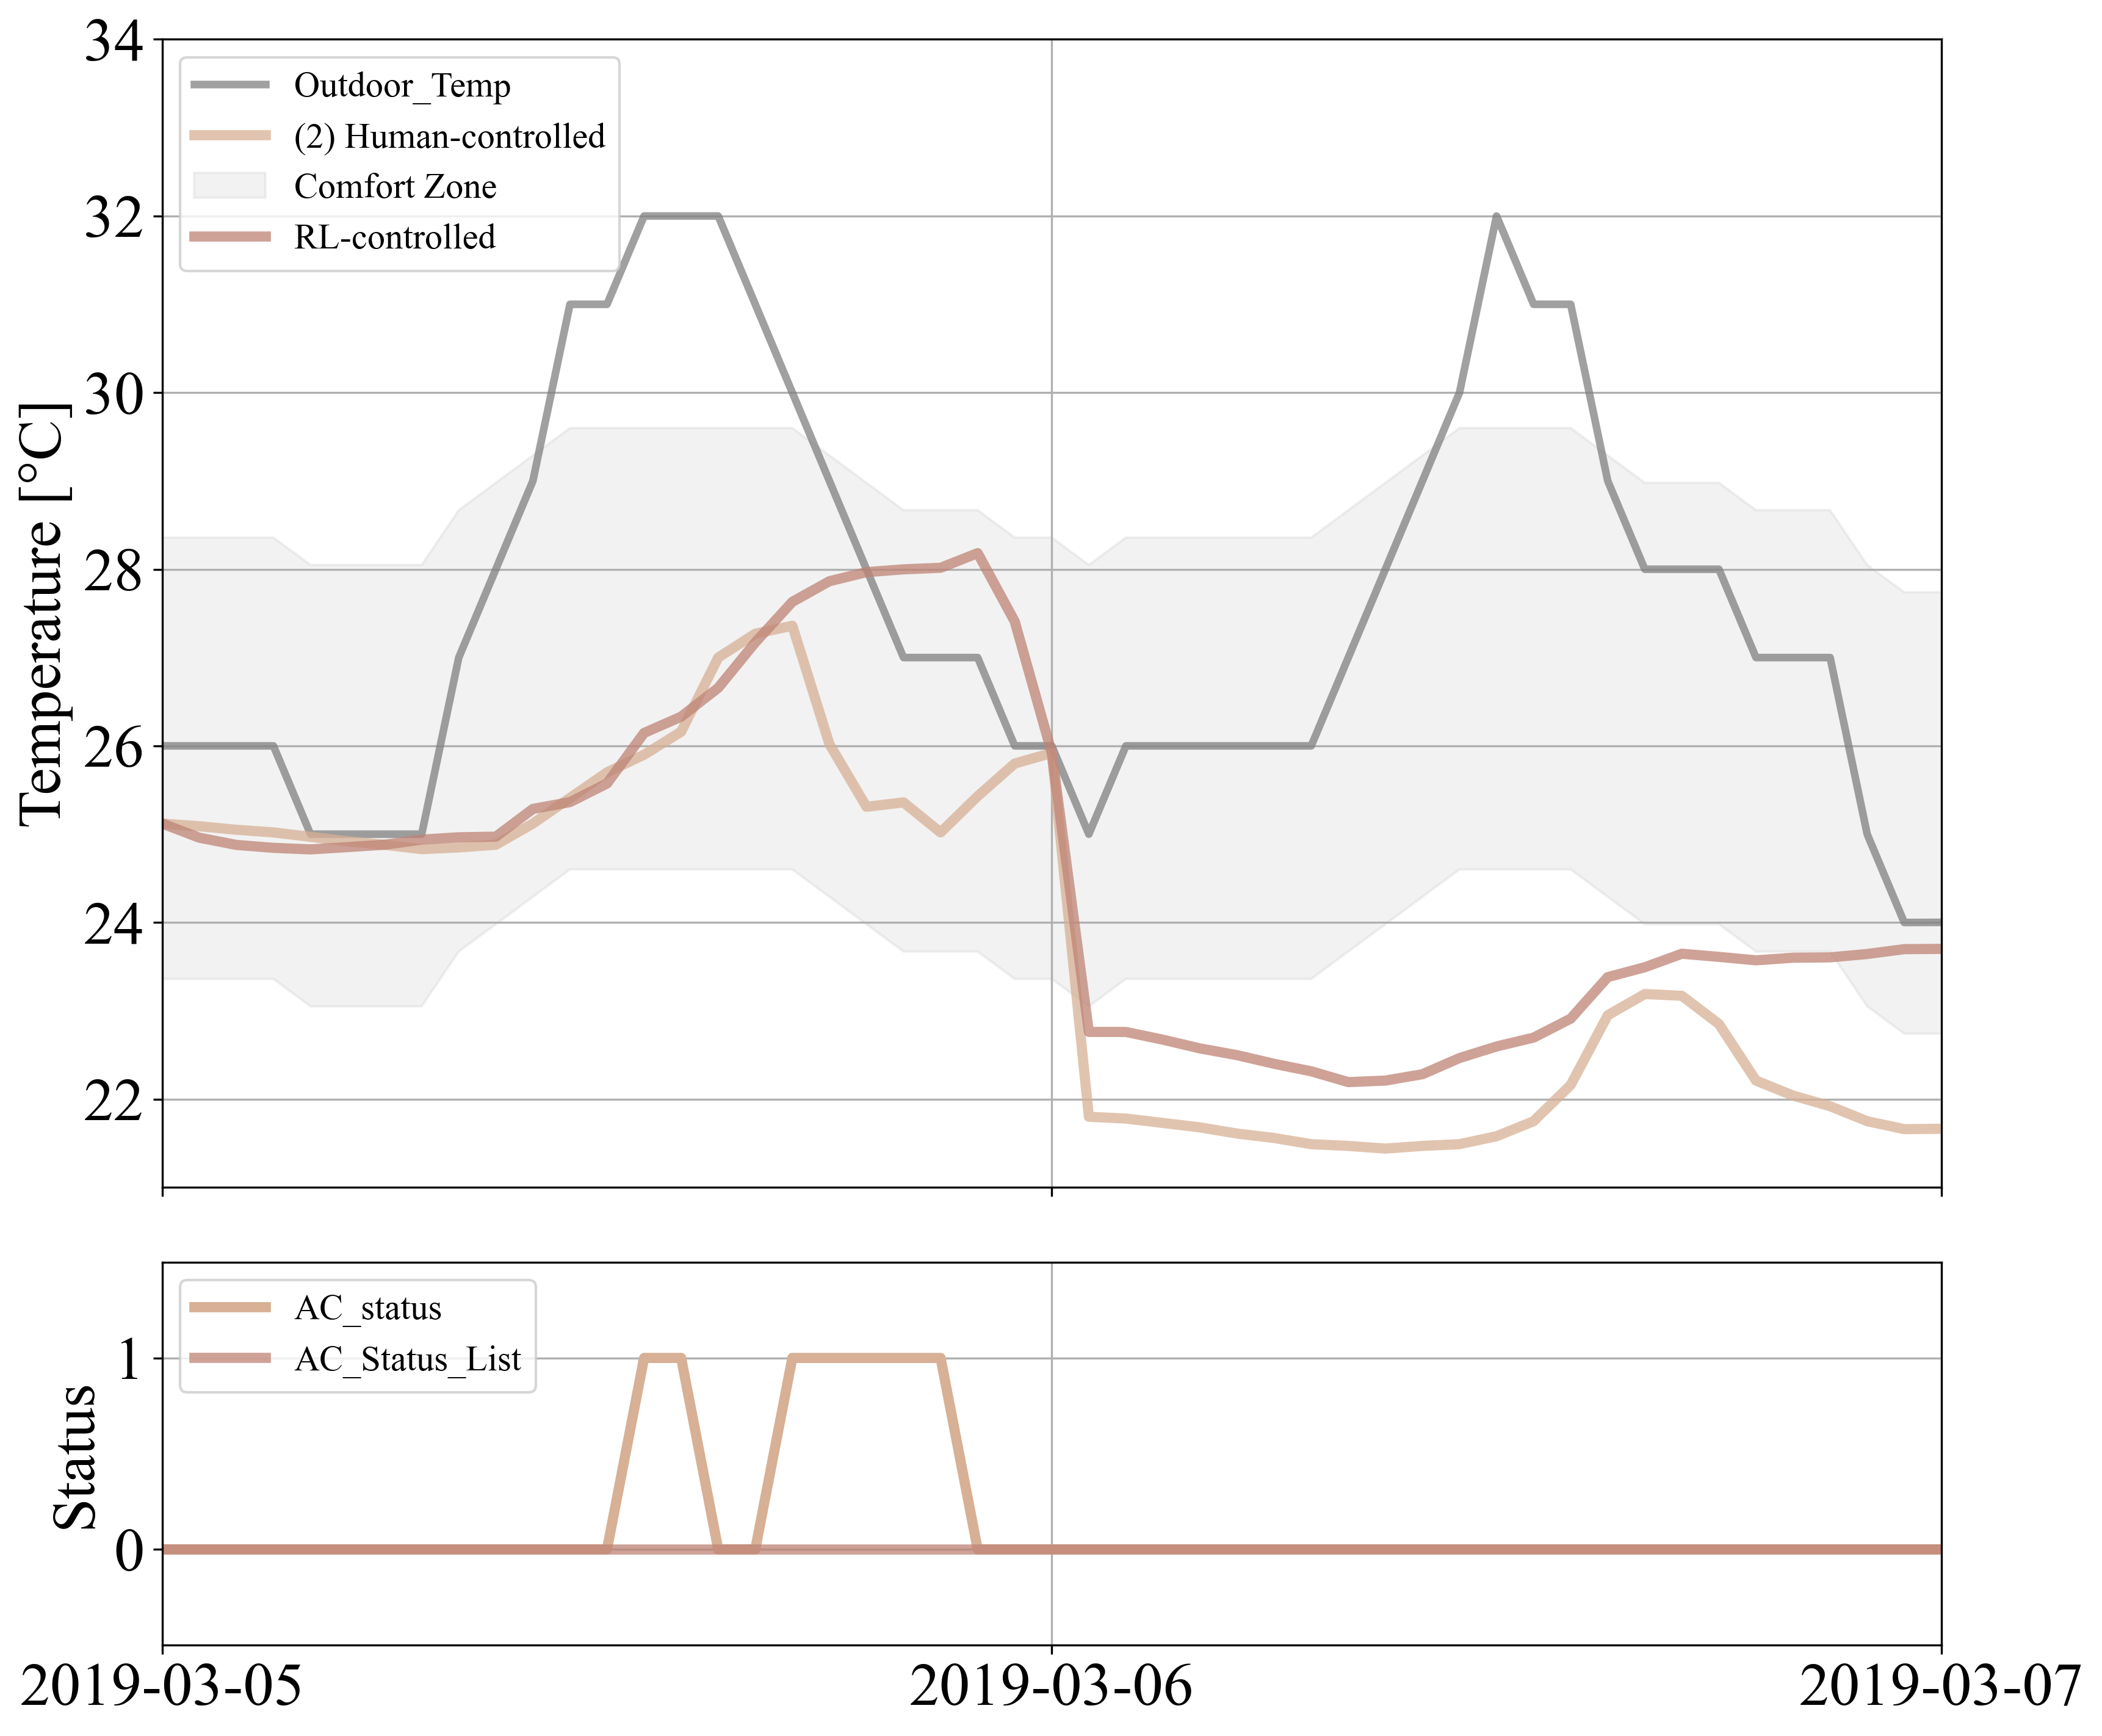

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc, dates
from datetime import datetime
import numpy as np

next_in_temp_list = np.interp(
    np.linspace(0, len(data_or.index)-1, len(data_or.index)),
    np.linspace(0, len(next_in_temp_list)-1, len(next_in_temp_list)),
    next_in_temp_list
)

AC_Status_List = np.interp(
    np.linspace(0, len(data_or.index)-1, len(data_or.index)),
    np.linspace(0, len(AC_Status_List)-1, len(AC_Status_List)),
    AC_Status_List
)

rc('font', family='Times New Roman', size=24)
standard = 'ASHRAE'
coordinates_dict = {'ASHRAE': [[17.4, 18.4, 23.4, 24.4], [23.6, 24.6, 29.6, 30.6], [10, 30]]}
L11, L12, U12, U11 = coordinates_dict[standard][0]
L21, L22, U22, U21 = coordinates_dict[standard][1]
T1, T2 = coordinates_dict[standard][2]
data_or_ = pd.read_csv(xgb_file)
data_or = data_or_[:120]
OutT = data_or['Outdoor_Temp']
data_or['Date_Time'] = pd.to_datetime(data_or['Date_Time'])
data_or = data_or.sort_values(by='Date_Time')
data_or.set_index('Date_Time', inplace=True)
UP = []
LO = []

for temp in OutT:
    if temp <= T1:
        L1, L2, U2, U1 = L11, L12, U12, U11
    elif temp >= T2:
        L1, L2, U2, U1 = L21, L22, U22, U21
    else:
        increase = (temp - T1) * (L21 - L11) / (T2 - T1)
        L1, L2, U2, U1 = L11 + increase, L12 + increase, U12 + increase, U11 + increase
    UP.append(U1 - 1)
    LO.append(L1 + 1)

fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(12, 10), dpi=300, sharex=True, gridspec_kw={'height_ratios': [3, 1]}
)


# Plot Temperature Change Line Chart
ax1.plot(data_or.index, data_or['Outdoor_Temp'], label='Outdoor_Temp', color='gray', alpha=0.75, linewidth=3)
ax1.plot(data_or.index, data_or['Indoor_Temp'], linestyle='-', linewidth=4, label='(2) Human-controlled', color='#d7b095', alpha=0.75)
ax1.fill_between(data_or.index, LO, UP, color='grey', alpha=0.1, label='Comfort Zone', interpolate=True)
ax1.plot(data_or.index, next_in_temp_list, linestyle='-', linewidth=4, label='RL-controlled', color='#bf8375', alpha=0.75)
date_format = dates.DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_major_locator(dates.DayLocator(interval=1))
ax1.tick_params(axis='x', rotation=0)
#ax1.set_title('RL-controlled Indoor temperature change',y=1.02)
ax1.set_ylabel('Temperature [°C]')
ax1.grid(True)
ax1.set_ylim(21, 34)
ax1.set_xlim(datetime(2019, 3, 5), datetime(2019, 3, 7))
ax1.legend(loc='upper left', fontsize=14)


# Plot Air Conditioning Status Line Chart
ax2.plot(data_or.index, data_or['AC_Status'], linestyle='-', linewidth=4, label='AC_status', color='#d7b095', alpha=1)
ax2.plot(data_or.index, AC_Status_List, linestyle='-', linewidth=4, label='AC_Status_List', color='#bf8375', alpha=0.75)
ax2.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_major_locator(dates.DayLocator(interval=1))
ax2.tick_params(axis='x', rotation=0)
ax2.set_ylabel('Status')
ax2.grid(True)
ax2.set_ylim(-0.5, 1.5)
ax2.set_xlim(datetime(2019, 3, 5), datetime(2019, 3, 7))
ax2.legend(loc='upper left', fontsize=14)


plt.tight_layout()
plt.show()